# MNIST

我们要解决的问题是：识别手写数字。

问题的输入：是一张灰度图像像素是 28 * 28。
问题的输出：是这张图片上的手写数字是几（0-9）

我们训练需要用到的数据源是 MNIST 包含 6W 张训练图像，1W 张测试图像


# 1、数据集
首先我们需要先加载数据集

In [1]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


2023-05-30 23:00:36.659131: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


train_images 和 train_labels 是训练集的数据和标签，train_images 是所有的训练数据。我们先来看一下数据的格式。

In [2]:
print(train_images.shape)
digit=train_images[4]

(60000, 28, 28)


train_images 是一个三维数组，表示的含义是 60000 个 28*28的二维数组。

每一个 28 * 28 的数组就是一张有 28 * 28 个像素的图片。

数组的值就是像素的值。我们找其中一个数组看一下。数值越大，颜色越黑，0是白色

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 55, 148, 210, 253, 253, 113, 87, 148, 55, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 87, 232, 252, 253, 189, 210, 252, 252, 253, 168, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 57, 242, 252, 190, 65, 5, 12, 182, 252, 253, 116, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 96, 252, 252, 183, 14, 0, 0, 92, 252, 252, 225, 21, 0, 0, 0, 0, 0, 0, 0

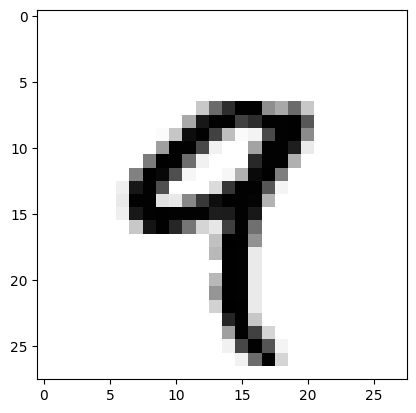

In [3]:
import matplotlib.pyplot as plt

digit=train_images[4]

# 打印数组
for arr in digit:
    print(arr.tolist())
# 打印图片
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

而 train_labels 就是每张图片对应的具体数字。我们看一下它的结构。

In [4]:
print(train_labels.shape)
print(train_labels)
print(train_labels[4])

(60000,)
[5 0 4 ... 5 6 8]
9


是一个一维数组，一共有 60000 个元素，正好与 train_images 的照片数量对应。上面我们输出了下标是 4 的图片，是一张 9 ，而对应的 label 也是9

test_images, test_labels 也是同样的结构，只不过图片数量是10000张。


总结一下，我们的输入是一张图片，它是用一个 28 * 28  的数组表示的，数组的值是像素值，取值范围是 [0,255]。数值越大，颜色越黑，每一个数组都有一个对应的标签（label），值是，图片上的对应的数字。

现在我们有60000组训练数据，有10000组测试数据。


# 2、构建网络架构
神经网络的核心组件是层（layer），神经网络的层是数据处理模块，它将输入的数据进行处理，然后将输出的数据输入到下一个神经网络的层。每一个神经网络的层会有多个单元。

下面我们搭建一个两层的神经网络。用来解决 MNIST 的问题

In [5]:
from keras import models
from keras import layers

network=models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28, )))
network.add(layers.Dense(10, activation='softmax'))

2023-05-30 23:00:39.595589: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


上面使用的层叫 Dense 层。是密集连接层，也叫全连接层，第一层是一个包含 512 个神经元的层，它的输入是一个 28 * 28 的数组(是一个形状为(28 * 28,1)的数组)。

第二层的输入是第一层的输出结果，第二层的输出是一个包含10个元素的数组（形状为（10,1））。每一个数值代表的是图片上的数字的概率。

下面是这个神经网络的结构图，由于节点太多，这里做了简化。

![](./resource/MNIST_01.png)

 # 3、编译网络
 编译网络主要是指定三个参数。
 + 损失函数：损失函数用来评估训练数据的性能，即评估预测值和实际值的差距，以便调整神经网络的参数。
 + 优化器：根据损失函数和训练数据来更新网络的机制。
 + 指标：在训练和测试时关注的指标。本例我们只关注预测正确的图片的比例

In [6]:
network.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

# 4、数据处理
在开始训练之前需要对数据进行处理一下。首先需要将之前形状为（60000,28,28）取值范围在[0,255]的图片数据转换成 （60000,28 * 28）取值范围为[0,1]二维数组。

In [7]:
train_images=train_images.reshape((60000, 28 * 28))
train_images=train_images.astype('float32') / 255


test_images=test_images.reshape((10000, 28 * 28))
test_images=test_images.astype('float32') / 255

我们输出下形状看一下。

In [8]:
print(train_images.shape)

(60000, 784)


我们还需要对标签进行处理。

In [9]:
from keras.utils import to_categorical


train_labels=to_categorical(train_labels)
test_labels=to_categorical(test_labels)


我们输出一下结果

In [10]:
print(train_labels.shape)
print(train_labels[4])

(60000, 10)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


每个标签处理后，是一个长度为10的数组，数组的值是0或者1，如果标签的的原始值 是9 那么对应的数组 a[9] = 1 ,其他位置都是0。

# 5、训练网络

下面开始训练网络

In [11]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 4ms/step - loss: 0.2544 - accuracy: 0.9271
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.1024 - accuracy: 0.9697
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0678 - accuracy: 0.9799
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0485 - accuracy: 0.9857
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0368 - accuracy: 0.9890


我们使用的是训练数据进行的训练。batch_size 表示的是批次大小。每次我们使用128张图片进行训练，训练数据一共是60000张数据，所以一次完整的训练需要分为 469 个批次。epochs 是迭代次数，我们一共迭代了5次。每次迭代的结果都会输出loss，即损失和 accuracy 精度。我们经过5次迭代，最终达到的精度是 98.8%

**PS:需要注意的是，如果你使用的是 jupyter，切记不要重复允许 fit 方法，如果需要重新运行，请重启内核**


# 6、测试网络
我们在测试集上进行测试。

In [12]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.0742 - accuracy: 0.9758
test_acc: 0.9757999777793884


测试集精度是 98.1% 比训练集要低，这种现象叫 **过拟合（overfit）**。 是指模型在新的数据集上的性能比在训练集上的性能要差。

# 7、神经网络内部到底在做什么

下面我们从数据角度理解下这个神经网络到底在做什么。

## 7.1 输入层
输入层的数据起始很简单，就是我们处理好的训练数据，准确的说是 train_images 这个形状是（60000, 784）的数组，这个数组的每一列都是一张28 * 28的灰度图片被打平的。然后我们还将这个数组的每一个值都除了一下 255。所以数组的值的取值范围是 [0,1]。输入层的每一个节点都表示一个数值。

所以输入层一共有 28 * 28 = 784 个节点，每次输入一列数据（一张图片的数据）。

我们把输入层的神经元从上到下依次标记为  a<sup>[0]</sup><sub>1</sub>、 a<sup>[0]</sup><sub>2</sub> 、、、a<sup>[0]</sup><sub>784</sub>。所以输入层的每一个节点都是一个像素的值。

## 7.2 第一层神经网络
第一层神经网络，也就是上面图里包含 512 个节点的那一层，我们先看这一层的第一个节点。如下图

![](./resource/MNIST_02.png)

这个节点做的事情也很简单。首先把 输入层输入的所有数相加，但是每个数都有一个权重。计算的公式如下：

z<sup>[1]</sup><sub>1</sub> = w<sub>1</sub> * a<sup>[0]</sup><sub>1</sub> + w<sub>2</sub> * a<sup>[0]</sup><sub>2</sub> + .... + w<sub>784</sub> * a<sup>[0]</sup><sub>784</sub> + b<sub>1</sub>

得到 z<sup>[1]</sup><sub>1</sub> 之后，会使用 relu 函数，计算 a<sup>[1]</sup><sub>1</sub>。 relu 函数 如下图：

![](./resource/MNIST_03.png)

函数的图像如下图：

![](./resource/MNIST_04.png)

我们把 z<sup>[1]</sup><sub>1</sub> 输入到 relu 函数中，会得到一个数值 这个数值就是 第一层神经网络的第一个节点的输出。 a<sup>[1]</sup><sub>1</sub>。

节点会保存所有 w 的值，并且在创建神经网络的时候**随机初始化** 所有 w 的值。


第一层神经网络的所有节点都会执行上面的两步操作，唯一的区别就是，每一个节点的 w 的数值是不一样的，所以在这一层我们一共有 512 * 784 个 w 数值。

当这一层的所有节点都执行完成后。 我们会得到 一个 [1,512] 的二维数组，数组就一列，每一行就一个元素。就是第一层神经网络输出的 a 值。如下图：

![](./resource/MNIST_05.png)

现在我们已经有了第一层神经网络的输出。也就是第二层神经网络的输入。即  [1,512]  的数组。下面我们来看第二层神经网络。

## 7.3 第二层神经网络
第二层神经网络是我们看到的最后一层，这一层一共包含 10 个节点。每个节点也会输出一个数值，范围也是(0,1) 代表的含义是这张图片上的数字是多少的概率。第一个节点代表数字是 0 的概率，第二个节点代表数字是 1 的概率。以此类推，我们可以知道，这 10 个接点输出的值加起来一共是 1 。

这些节点做的事情也很简单，跟第一层神经网络类似。我们还是先拿其中一个节点来看。

![](./resource/MNIST_06.png)


这个节点会接收第一层神经网络输入的 512 个数值，然后对这些参数按照一定的权重进行加和得到 z<sup>[2]</sup><sub>1</sub>

z<sup>[2]</sup><sub>1</sub> = w<sub>1</sub> * a<sup>[1]</sup><sub>1</sub> + w<sub>2</sub> * a<sup>[1]</sup><sub>2</sub> + .... + w<sub>512</sub> * a<sup>[1]</sup><sub>512</sub> + b<sub>1</sub>

得到 z<sup>[2]</sup><sub>1</sub>  之后，再计算 e<sup>z<sup>[2]</sup><sub>1</sub> 的值（e 是自然常数）。
    
当第二层的所有节点都计算结束后，对所有节点得到的数值进行求和。然后再用每一个节点计算的值，除以总和，就得到了最终的输出 a<sup>[2]</sup> 。

说起来比较复杂，下面用图形描述一下计算过程。
    
![](./resource/MNIST_07.png)

上面的图就是 softmax 函数的计算过程，用函数表示就是下面这种：

![](./resource/MNIST_08.png)

由于上一层一共有 512 个节点，所以第二层神经网络的每一个节点都会保存 512 个 w 的参数，第二层共 10 个节点所以有 512 * 10 个 w 参数。

第二层的输出是 10 个概率数值，依次表示图片上的数字是 0 - 9 的概率。

## 7.4 损失函数



现在我们已经有了神经网络预测的图片上数字的概率分布。但是，由于神经网络中的 w 参数都是随机初始化的，所以神经网络给出的预测值是非常不准确的。为了能够有效的调整 w 参数，我们首先需要对神经网络给出结果进行衡量。而衡量的办法就是通过损失函数。

损失函数（loss function）就是用来度量模型的预测值f(x)与真实值Y的差异程度的运算函数。我们在编译网络时指定的损失函数是 categorical_crossentropy。这个损失函数的公式是：

![](./resource/MNIST_09.png)

公式中的 y<sub>i</sub>，就是我们在数据处理中对标签的处理结果，一个长度为10的数组，数组的值是0或者1，如果标签的的原始值 是9 那么对应的数组 a[9] = 1 ,其他位置都是0。另外一个参数就是第二层神经网络的输出。展开来看的话就是：


loss = - (train_label[0] * log<sub>a0</sub> + train_label[1] * log<sub>a1</sub> + ... + train_label[9] * log<sub>a9</sub> )

因为 train_label数组只有一个值是 1 其余的都是 0。所以公式可以简化成：

loss = - train_label[i] * log<sub>ai</sub> = -log<sub>ai</sub> 

所以，损失函数的值越小，就要求 ai 的值越大，即神经网络给出的概率值越高。也就是神经网络预测的结果越准确。

## 7.5 反向传播 
我们的目标是 loss 尽可能的小，也就是希望 a<sub>i</sub> 尽可能的大。根据上面计算 a<sub>i</sub> 的过程来看，我们假设 i = 3。

![](./resource/MNIST_10.png)

那么就是希望 a<sup>[2]</sup><sub>3</sub> 变大。反向推导就是希望 sum 变小，e<sup>z<sup>[2]</sup><sub>3</sub></sup> 值变大。接着反向推导则可以发现，最后是希望 z<sup>[2]</sup><sub>3</sub> 变大，其余的 z<sup>[2]</sup> 变小。

现在，我们已经知道需要将 z<sup>[2]</sup><sub>3</sub> 变大，其余的 z<sup>[2]</sup> 变小了。而且我们还知道 z 的计算公式：

z<sup>[2]</sup><sub>1</sub> = w<sub>1</sub> * a<sup>[1]</sup><sub>1</sub> + w<sub>2</sub> * a<sup>[1]</sup><sub>2</sub> + .... + w<sub>512</sub> * a<sup>[1]</sup><sub>512</sub> + b<sub>1</sub>

所以我们可以通过调整参数 w 的值来达到目的，比如，如果 a<sup>[1]</sup><sub>512</sub> 比较大，那么我可以将  w<sub>512</sub> 减少 0.01，以此来达到减小 z 值的目的。或者将 w<sub>512</sub>  增加 0.01 来达到增大 z 值的目的。更新的这个 0.01 我们称为**学习率**。具体更新多少，取决于我们使用的优化器。我们使用的是 rmsprop 优化器，这个优化器默认的学习率就是 0.01。
具体的优化方式肯定比这个要复杂，可以参考 [keras中文文档](https://keras.io/zh/optimizers/#rmsprop),以及 [rmsprop: Divide the gradient by a running average of its recent magnitude](http://www.cs.toronto.edu/~tijmen/csc321/slides/lecture_slides_lec6.pdf)



同样的方式也可以进行更新第一层神经网络中 w 的参数，比如，a<sup>[1]</sup><sub>512</sub> 比较大，我们希望它变小，反向推导就是希望 
Sigmoid（z<sup>[1]</sup><sub>512</sub>）的值变小，根据 Sigmoid 函数的图像，就是希望 z<sup>[1]</sup><sub>512</sub> 的值变小，
而我们现在已知 z<sup>[1]</sup><sub>512</sub> 的计算公式：

z<sup>[1]</sup><sub>512</sub> = w<sub>1</sub> * a<sup>[0]</sup><sub>1</sub> + w<sub>2</sub> * a<sup>[0]</sup><sub>2</sub> + .... + w<sub>784</sub> * a<sup>[0]</sup><sub>784</sub> + b<sub>1</sub>

所以，我们依然可以通过调整 w 参数的方式来达到目的。


这个反向推导的过程就是 **反向传播**。实现方式就是通过对 loss 进行求导。根据导数来更新 w 的值。

## 7.6 梯度下降
根据导数进行更新 w 值的过程叫做 **梯度下降**。我们现在是只计算了一张图片（一个数据集）的数据后，就进行了 w 参数的更新。这种方式叫**随机梯度下降**。这种方式的缺点是计算成本高，而且 w 的值会出现左右摇摆式的更新。

还有一种方式叫 **批量梯度下降法**，这种方式是我们计算完所有的数据集之后，对结果进行求平均值，根据平均值进行 **反向传播**。这种方式的缺点是当数据集非常大的时候计算会非常慢。而且 w 参数更新的次数不多，即迭代次数较少，很难收敛到最优解。

最后还有一种折中的方式叫**小批量梯度下降**。这种方式是每次计算 batch_size 个数据集后，进行一次 w 参数的更新。batch_size 可以在代码里指定，我们指定的 batch_size = 128，所以每计算 128 张图片后，就更新一次 w 的参数，所以可以得出，我们循环一遍数据集后 一共更新了 60000/128 = 468.75 次，也就是 469 次参数。而我们一共在数据集上循环了 5 遍（epochs=5）。所以我们一共更新了 469 * 5 = 2345次 w 的值。


## 7.7 测试

第一层神经网络我们一共有 28 * 28 * 512 = 401408 个 w 参数，第二层神经网络我们一共有 512 * 10 = 5120 个，所以我们的神经网络中一共有 
401408 + 5120 = 406528 个参数。这就是说，我们定义了一个有 40 万个参数的函数,这个函数有 28 * 28 个入参，有 10 个出参，每个出参是这个图片上的数字是几的概率。

还记得我们的问题么？问题的输入：是一张灰度图像像素是 28 * 28。 问题的输出：是这张图片上的手写数字是几（0-9）

有了这个函数之后，我们就可以输入任意的一张 28 * 28 的图片，而这个函数会告诉我们，这个图片上的数字是 0-9 的概率。我们只需要取一个最大的概率值就可以了。

# 8、结束

好了，到这来就结束了。其实神经网络深度学习，并没有多么神秘。它的本质其实就是我们先定义一个函数，然后根据数据集来更新函数中的参数。通过不断地更新达到一个最优的效果。整个过程类似于**函数拟合**。我们有一个数据集，要根据这些数据找到一个函数，来描述数据集。只不过这个函数的参数有点多而已。

# 9、总结

神经网络的层：
+ Dense（密集连接层）：可以用来处数值类的数据

激活函数：
+ relu： 一般配合 Dense 使用
+ softmax：用于处理多分类问题，最终输出每个分类的概率

损失函数：
+ categorical_crossentropy：用于多分类问题

优化器：
+ rmsprop

